In [22]:
# Build PCA

In [23]:
# Why dimensionality reduction
# 1) space efficiency
# 2) computing efficiency
# 3) visualization - we cannot visualize 1000 dimension - remember dimensions and features are synonyms

# build PCA and then cmpare it to T-SNE and LDA 

In [24]:
import numpy as np
np.random.seed(1) # good for debugging

In [25]:
# STEP 1 - create dataset
mu_vec1 = np.array([0,0,0]) # sample mean

'''
COVARIANCE: is a measure of the joint variability of two or more random variables
in easy words  If the greater values of one variable mainly correspond with the greater values of the other variable, 
and the same holds for the lesser values, 
i.e., the variables tend to show similar behavior, the covariance is positive
'''

cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance
# we are going to use both mu_vec1 and cov_mat to generate sample values
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print(class1_sample)
print(class1_sample.shape)

# the covariance matrix indicate how far off the mean we want to stretch the data
# https://notesonml.files.wordpress.com/2015/06/ml22.png
# in this image the red part of the 3D bell is the mean

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]
(3, 20)


In [26]:
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance
# we are going to use both mu_vec1 and cov_mat to generate sample values
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print(class2_sample)
print(class1_sample.shape)

[[ 0.24560206  0.70190716  2.13162939 -0.39649634  1.16003707 -1.02220122
   1.23009474  0.79924193  1.19829972  1.37756379  2.19891788  0.36126959
   0.65614632  1.69803203  1.40349164  1.16938243  0.73378149  1.31515939
   1.35054598 -0.61577235]
 [ 2.25286816  1.48851815  2.51981682 -0.44411381  1.87616892  0.69379599
   1.76201118  1.18656139  1.11900865  1.12182127  1.18515642  1.42349435
   1.04359686  0.55287144  1.59357852  1.74055645  1.03261455  1.84616065
  -0.31228341  2.12141771]
 [ 1.51292982  0.92442829  3.18557541  0.49553414  1.31563495  1.82797464
   0.77767186  1.41005165  0.32933771  2.12948391  0.62471505  1.07734007
   0.37999916  2.2245077  -0.09491185  0.0462994  -0.37311732  0.14048406
   0.96130449  1.40890054]]
(3, 20)


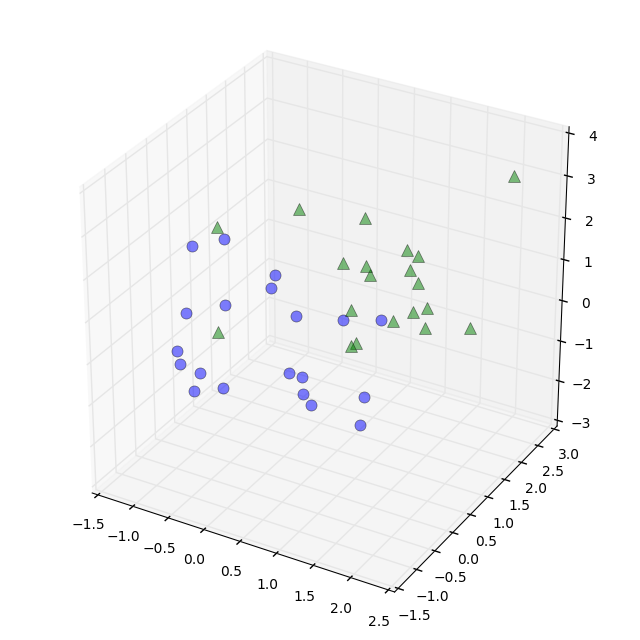

In [27]:
# STEP 2 - plot the data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline 

#figure witdh and height
fig = plt.figure(figsize=(8,8))
# 3d subplot
# these are subplot grid parameters encoded as a single integer
ax = fig.add_subplot(111, projection='3d')# first two 1 mean 1x1 grid, the second 1 means we work on the 1st plot
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0, :], class1_sample[1, :], class1_sample[2, :],
       'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0, :], class2_sample[1, :], class2_sample[2, :],
       '^', markersize=8, color='green', alpha=0.5, label='class2')
plt.show()

In [28]:
# STEP 3 - merge the data into one bigASS dataset

In [29]:
all_sample = np.concatenate((class1_sample, class2_sample), axis=1)

In [30]:
# STEP 4 - compute the dimensional mean vector

In [31]:
# the dimensional mean vector it will help to compute the covariance matrix
# mean for each feature
mean_x = np.mean(all_sample[0, :])
mean_y = np.mean(all_sample[1, :])
mean_z = np.mean(all_sample[2, :])

#3d vector of mean
mean_vector = np.array([[mean_x], [mean_y], [mean_z]])
print(mean_vector)

[[ 0.41667492]
 [ 0.69848315]
 [ 0.49242335]]


In [32]:
# STEP 5 - compute the covariance matrix

In [33]:
cov_mat = np.cov(all_sample) #compute the covariance matrix with the built in function of numpy

In [34]:
# that's the result, my covariance matrix
cov_mat

array([[ 0.9868668 ,  0.26943262,  0.2855759 ],
       [ 0.26943262,  0.92914135,  0.30682016],
       [ 0.2855759 ,  0.30682016,  1.27528118]])

In [35]:
# STEP 6 - compute the eigenvalues and the eigenvectors
# compute the eigenvalues and the eigenvectors
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

In [36]:
# that's what I get
eig_vec_sc

array([[-0.49210223, -0.64670286,  0.58276136],
       [-0.47927902, -0.35756937, -0.8015209 ],
       [-0.72672348,  0.67373552,  0.13399043]])

In [50]:
# build the pairs of eigenvalues and eigenvectors
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

In [51]:
# here it is the pair
eig_pairs

[(1.6710094305328693, array([-0.49210223, -0.47927902, -0.72672348])),
 (0.83832597341584536, array([-0.64670286, -0.35756937,  0.67373552])),
 (0.68195393031018148, array([ 0.58276136, -0.8015209 ,  0.13399043]))]

In [57]:
# visually check that the list is sorted by decreasing values
for i in eig_pairs:
    print(i[0])

1.67100943053
0.838325973416
0.68195393031


In [64]:
# STEP 7 - choose k eigenvectors (in this case k=2)
matrix_w = np.hstack((eig_pairs[0][1].reshape(3, 1),
                    (eig_pairs[1][1].reshape(3, 1))))

In [65]:
# print in order to see if it's correct
matrix_w

array([[-0.49210223, -0.64670286],
       [-0.47927902, -0.35756937],
       [-0.72672348,  0.67373552]])

In [67]:
# now that I have selected the two highest heigenvalues I can go forward with the
# STEP 8 - transform my data using the heigenpairs
transformed = matrix_w.T.dot(all_sample)
# here is what's happening, take the heigenvector matrix (matrix_w) that is a 3x2 matrix,
# take the transpose of that matrix(matrix_w) and multiply it with the starting matrix(all_samples)
# that is a 3x40 matrix, the result will a 2x40 matrix as follow
print(transformed.shape)

(2, 40)


In [68]:
transformed

array([[-0.12230714,  1.78582073, -0.72564846,  0.91911067, -0.48120545,
         1.26186049,  0.49974121, -1.36060904, -0.02630959,  0.20346559,
         1.02990798,  0.74684543, -0.76873682,  0.37184198, -0.48040292,
        -1.30433953, -0.57308381,  0.9748035 , -0.78806782, -1.23832629,
        -2.30009539, -1.73062935, -4.57170736,  0.04785487, -2.42616804,
        -1.15792646, -2.01497976, -1.98672036, -1.36534078, -2.76311357,
        -2.1041081 , -1.64296088, -1.09921946, -2.71718701, -1.38545546,
        -1.44331476, -0.58485289, -1.63411201, -1.21353834, -1.73760916],
       [-1.18757151, -1.16617976, -0.64124251, -1.74952646,  1.10969495,
         0.18151348, -0.97722286, -0.72412904, -0.42090149,  1.05827266,
         0.12619324,  0.77808138,  1.75701561, -1.00931473, -0.08774954,
         1.75869787, -0.09616466,  0.4009659 ,  0.49058694, -0.10791262,
         0.05492635, -0.3633537 , -0.13330484,  0.74907576, -0.53466984,
         1.6445517 , -0.90160187,  0.00885182, -0.

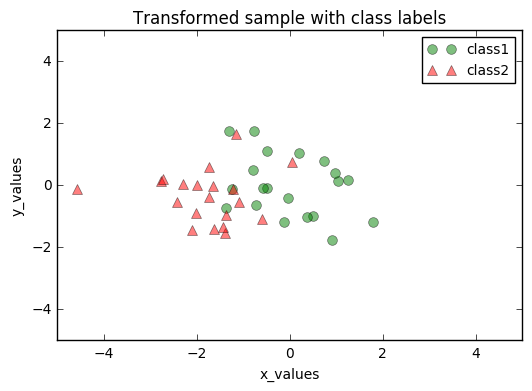

In [69]:
# visualize the result
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1, 20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed sample with class labels')

plt.show()

In [ ]:
# that is the final result, now I have a 2-dimensional dataset instead of a 3-dimensional dataset